

---


Integrantes:
*   Oziel Banda Hernández
*   Joshua Santiago Cruz Pérez
*   Naomi Daniela Jiménez Borzani
*   Ximena Paredes Hernández


---










---

b) Repetir a) usando la factorización de Householder para poner $H=Q R$. Calcular la cantidad pedida en la ecuación (2) y comparar nuevamente con los dos anteriores.

---



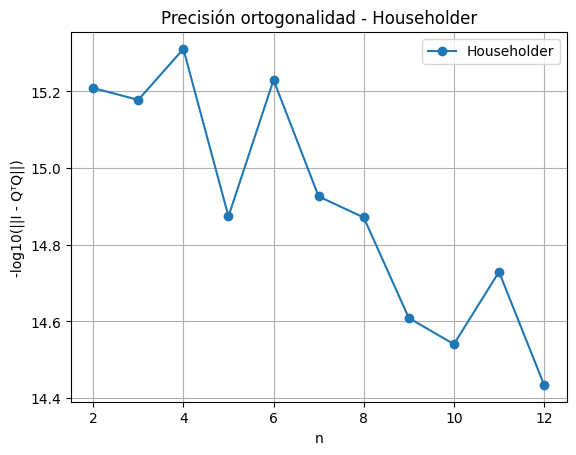

In [ ]:
import numpy as np
import matplotlib.pyplot as plt            # Para graficar los resultados
from math import sqrt                      # Para calcular raíces cuadradas

# ---------------------
# Función para multiplicar matrices
# ---------------------
def multi_m(M, N):
    """
    Multiplica dos matrices M y N.
    M es de tamaño m×p, N es de tamaño p×n. Devuelve la matriz resultado C (m×n).
    """
    m = len(M)
    p = len(M[0])
    n = len(N[0])
    C = [[0.0] * n for _ in range(m)]     # Inicializa matriz resultado con ceros
    for i in range(m):
        for j in range(n):
            suma = 0.0
            for k in range(p):            # Producto escalar entre fila y columna
                suma += M[i][k] * N[k][j]
            C[i][j] = suma
    return C

# ---------------------
# Función para transponer una matriz cuadrada
# ---------------------
def transpuesta(M):
    """
    Calcula la traspuesta de una matriz cuadrada M (n x n).
    """
    n = len(M)
    T = [[0.0]*n for _ in range(n)]       # Matriz traspuesta inicializada en ceros
    for i in range(n):
        for j in range(n):
            T[i][j] = M[j][i]             # Intercambia filas por columnas
    return T

# ---------------------
# Calcula la norma 2 (Euclidiana) de un vector
# ---------------------
def norm_vec(x):
    """
    Calcula la norma 2 (Euclidiana) de un vector x.
    """
    suma = 0.0
    for xi in x:
        suma += xi*xi
    return sqrt(suma)

# ---------------------
# QR con reflexiones de Householder
# ---------------------
def qr_householder(A):
    """
    Realiza la descomposición QR de la matriz A usando transformaciones de Householder.
    Devuelve las matrices Q (ortogonal) y R (triangular superior) tales que A = QR.
    """
    n = len(A)
    R = [row[:] for row in A]             # Copia profunda de A para ir modificando
    Q_acc = [[1.0 if i==j else 0.0 for j in range(n)] for i in range(n)]  # Matriz identidad (para acumular Q)

    for k in range(n-1):                  # Itera por columnas (menos la última)
        # Extrae subvector x (columna k desde fila k)
        x = [R[i][k] for i in range(k, n)]
        # Vector base para reflejo (1, 0, 0, ..., 0)
        e = [1.0] + [0.0]*(n-k-1)
        signo = 1.0 if x[0] >= 0 else -1.0
        alpha = -signo * norm_vec(x)

        # Calcula vector u = x + alpha * e
        u = [x_i + alpha * e_i for x_i, e_i in zip(x, e)]
        norm_u = norm_vec(u)
        if norm_u == 0:
            continue                      # Si u es cero, no aplica reflexión
        v = [ui / norm_u for ui in u]     # Normaliza u → v

        # Construye la matriz de reflexión Q_min (tamaño reducido)
        m = len(v)
        Q_min = [[(1.0 if i==j else 0.0) - 2*v[i]*v[j] for j in range(m)]
                 for i in range(m)]

        # Expande Q_min a una matriz Q_t de tamaño completo (n x n)
        Q_t = [[1.0 if i==j and i<k else 0.0 for j in range(n)] for i in range(n)]
        for i in range(k, n):
            for j in range(k, n):
                Q_t[i][j] = Q_min[i-k][j-k]

        # Aplica el reflector a R y acumula en Q_acc
        R = multi_m(Q_t, R)
        Q_acc = multi_m(Q_t, Q_acc)

    Q = transpuesta(Q_acc)               # Q = (Q_acc)^T
    return Q, R                           # Devuelve Q y R

# ---------------------
# Medida de ortogonalidad
# ---------------------
from numpy.linalg import norm as np_norm
def medida_ortog(Q):
    """
    Calcula la precisión de ortogonalidad de Q como:
        -log10( || I - Qᵀ·Q ||_F )
    donde ||·||_F es la norma de Frobenius.
    """
    n = len(Q)
    Qt = transpuesta(Q)                       # Q^T
    QtQ = multi_m(Qt, Q)                   # Q^T * Q
    # Error: diferencia con la matriz identidad
    E = [[(1.0 if i==j else 0.0) - QtQ[i][j] for j in range(n)] for i in range(n)]
    flat = [E[i][j] for i in range(n) for j in range(n)]  # Aplana para usar norma
    return -np.log10(np_norm(flat))       # Retorna la medida

# ---------------------
# Bloque principal
# ---------------------
def main():
    """
    Genera un gráfico de la precisión de ortogonalidad de matrices Q
    obtenidas con Householder sobre matrices de Hilbert de tamaño 2 a 12.
    """
    tam = list(range(2, 13))           # Tamaños n = 2,3,...,12
    hh_scores = []                         # Guarda resultados de ortogonalidad

    for n in tam:
        # Construye matriz de Hilbert H[i,j] = 1/(i+j+1)
        H = [[1.0/(i+j+1) for j in range(n)] for i in range(n)]
        Q_hh, _ = qr_householder(H)        # Aplica QR con Householder
        hh_scores.append(medida_ortog(Q_hh))  # Mide ortogonalidad

    # Grafica resultados
    plt.plot(tam, hh_scores, 'o-', label='Householder')
    plt.xlabel('n')
    plt.ylabel('-log10(||I - QᵀQ||)')
    plt.title('Precisión ortogonalidad - Householder')
    plt.legend()
    plt.grid(True)
    plt.show()

# ---------------------
# Ejecución principal
# ---------------------
if __name__=='__main__':
    main()




---

c) Una manera de calcular una base ortogonal es usando las ecuaciones normales. Al formar la matriz de las ecuaciones normales y calcular su factorización de Cholesky $A^t A=L L^t$, tenemos
$$
I=L^{-1}\left(A^t A\right) L^{-T}=\left(A L^{-t}\right)^t\left(A L^{-t}\right)
$$
es decir, $Q=A L^t$ es ortogonal y su espacio columna es el mismo que el de $A$. Repetir el procedimiento anterior usando la matriz $Q$ obtenida arriba. Graficar los resultados comparando con los obtenidos por Gram-Schmidt.

---



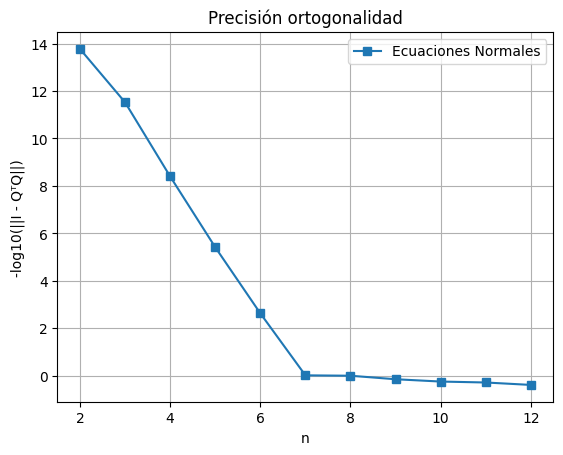

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

def multi_m(M, N):
    """
    Multiplica dos matrices M (m x p) y N (p x n) usando bucles anidados.
    Devuelve la matriz producto C de tamaño m x n.
    """
    m = len(M)             # número de filas de M
    p = len(M[0])          # número de columnas de M (y filas de N)
    n = len(N[0])          # número de columnas de N
    # Inicializamos la matriz resultado C con ceros
    C = [[0.0] * n for _ in range(m)]
    # Recorremos cada elemento de C para calcularlo
    for i in range(m):
        for j in range(n):
            suma = 0.0
            # Producto escalar de la fila i de M por la columna j de N
            for k in range(p):
                suma += M[i][k] * N[k][j]
            C[i][j] = suma
    return C


def transpuesta(M):
    """
    Calcula la traspuesta de una matriz cuadrada M (n x n).
    Devuelve la matriz T tal que T[i][j] = M[j][i].
    """
    n = len(M)                            # tamaño de la matriz cuadrada
    T = [[0.0]*n for _ in range(n)]      # inicializamos la traspuesta con ceros
    for i in range(n):
        for j in range(n):
            T[i][j] = M[j][i]            # intercambiamos índices
    return T

# -----------------------------------------------
# Funciones Cholesky y Sustitución hacia adelante
# -----------------------------------------------
def SustDelante(L, b):
    """
    Resuelve el sistema Ly = b para y, donde L es triangular inferior.
    Aplica sustitución hacia adelante.
    """
    y = np.zeros_like(b)      # vector solución inicializado en ceros
    n = len(b)
    for i in range(n):
        suma = 0.0
        # sumamos L[i,j] * y[j] para j < i
        for j in range(i):
            suma += L[i, j] * y[j]
        # despejamos y[i]
        y[i] = (b[i] - suma) / L[i, i]
    return y


def Cholesky(A):
    """
    Factoriza la matriz simétrica definida positiva A como A = L L^T.
    Corrige pequeños errores numéricos que pudieran generar valores ligeramente negativos.
    """
    n = A.shape[0]
    L = np.zeros_like(A)     # inicializamos L con ceros
    tol = 1e-14              # tolerancia para tratar valores muy pequeños
    for i in range(n):
        for j in range(i+1):
            if i == j:
                # Cálculo del elemento diagonal L[i,i]
                suma = 0.0
                for k in range(i):
                    suma += L[i, k]**2
                diag = A[i, i] - suma
                # Si diag es casi cero o negativo, lo ajustamos
                if diag < tol:
                    diag = abs(diag)
                    if diag < tol:
                        diag = tol
                L[i, i] = sqrt(diag)
            else:
                # Cálculo de los elementos fuera de diagonal L[i,j]
                suma = 0.0
                for k in range(j):
                    suma += L[i, k] * L[j, k]
                pivote = L[j, j]
                # Ajuste si el pivote es muy pequeño
                if abs(pivote) < tol:
                    pivote = tol
                L[i, j] = (A[i, j] - suma) / pivote
    return L

# ---------------------
# Función Q via ecuaciones normales
# ---------------------
def qr_ecuaciones_normales(A):
    """
    Construye Q de la descomposición QR de A usando las ecuaciones normales:
      1) Calcula AtA = A^T A
      2) Factoriza AtA = L L^T (Cholesky)
      3) Q = A * L^{-T}
    Devuelve la matriz ortogonal Q.
    """
    At = transpuesta(A)           # traspuesta de A
    AtA = multi_m(At, A)       # multiplicación A^T * A
    L = Cholesky(np.array(AtA))    # L tal que AtA = L L^T
    n = L.shape[0]
    # Construimos la identidad para invertir L por sustitución
    I = [[1.0 if i==j else 0.0 for j in range(n)] for i in range(n)]
    L_inv = [[0.0]*n for _ in range(n)]
    # Calculamos columnas de L^{-1} resolviendo L y = e_j
    for j in range(n):
        # vector base e_j
        e = np.zeros(n)
        e[j] = 1.0
        # resolvemos L y = e
        y = SustDelante(L, e)
        # guardamos la columna j de L^{-1}
        for i in range(n):
            L_inv[i][j] = y[i]
    # Finalmente Q = A * (L^{-1})^T
    Q = multi_m(A, transpuesta(L_inv))
    return Q

# ---------------------
# Medida de ortogonalidad
# ---------------------
from numpy.linalg import norm as np_norm

def medida_ortog(Q):
    """
    Calcula la precisión de ortogonalidad de Q como:
      -log10( || I - Q^T Q ||_F )
    donde ||·||_F es la norma de Frobenius.
    """
    n = len(Q)
    Qt = transpuesta(Q)           # Q^T
    QtQ = multi_m(Qt, Q)       # Q^T * Q
    # Error E = I - Q^T Q
    E = [[(1.0 if i==j else 0.0) - QtQ[i][j] for j in range(n)] for i in range(n)]
    # Aplanamos la matriz para calcular su norma
    flat = [E[i][j] for i in range(n) for j in range(n)]
    # Retornamos -log10 de la norma de Frobenius
    return -np.log10(np_norm(flat))

def main():
    tam = list(range(2, 13))   # tamaños n = 2,3,...,12
    ne_scores = []                  # lista para almacenar las puntuaciones
    for n in tam:
        # Construcción de la matriz de Hilbert H[i,j] = 1/(i+j+1)
        H = [[1.0/(i+j+1) for j in range(n)] for i in range(n)]
        # QR por ecuaciones normales
        Q_ne = qr_ecuaciones_normales(H)
        # Medida de ortogonalidad de Q
        ne_scores.append(medida_ortog(Q_ne))
    # Trazamos los resultados
    plt.plot(tam, ne_scores, 's-', label='Ecuaciones Normales')
    plt.xlabel('n')
    plt.ylabel('-log10(||I - QᵀQ||)')
    plt.title('Precisión ortogonalidad')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == '__main__':
    main()




---

d) ¿Se puede dar una explicación de la calidad de los resultados obtenidos por los distintos métodos?.

---



Podemos explicarlo de manera que la claridad que tiene cada metodo por los digitos de presición como función de n dado que mientras tengamos un valor mas grande entonces Q estara mas cerca de de ser ortogonal
Para householder se va mantener que sea ortogonal pero habra pequeños errores de redondeo, mientras que en las ecuaciones normales y cholesky al hacer A transpuesta por A va a ser el doble variable y al aplicarle cholesky va a ser mas dificil que sea completamente ortogonal y lo podemos visualizar de manera explicita en las graficas de los incisos anteriores.

